<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/Aliasing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Aliasing</h1></b>

Dr. Bingsen Wang

12/5/2023
</center>

#Python Code
The Python code illustrates aliasing.  

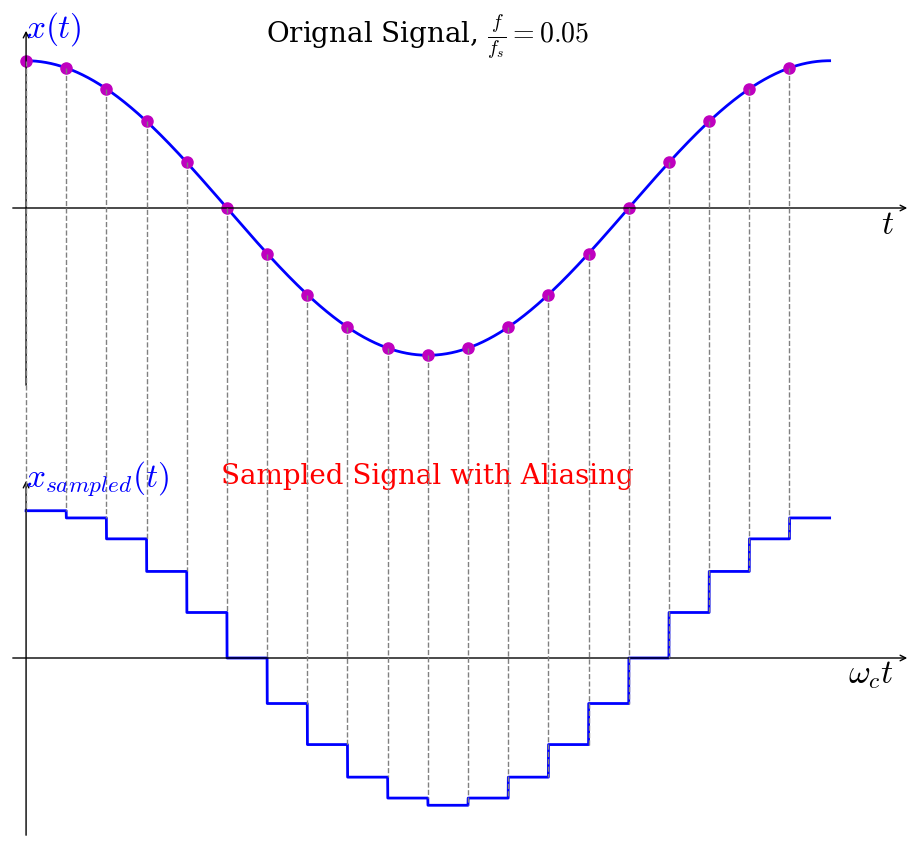

In [29]:
import matplotlib
from os import linesep
from numpy import linspace,cos,pi
import matplotlib.pyplot as plt
from matplotlib import animation,rc
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "serif","mathtext.fontset" : "cm"})

def f(MI,fm,theta,t): #original signal: fm-fundamenal
  return MI*cos(2*pi*fm*t + theta)

def f_sampled(MI,fm,fs,theta,t): #sampled signal: fm-fundamenal, fs-sampling freq
  t = t-t%(1/fs)
  return MI*cos(2*pi*fm*t + theta)

# draw dotted line between two sets of points in two different plots
def l2Ax(fig,ax1,ax2,ps1,ps2):
  line_set = []
  transFigure = fig.transFigure.inverted()
  for k in range(len(ps1[0])):
    p1 = transFigure.transform(ax1.transData.transform([ps1[0][k],ps1[1][k]]))
    p2 = transFigure.transform(ax2.transData.transform([ps2[0][k],ps2[1][k]]))
    line = matplotlib.lines.Line2D((p1[0],p2[0]),(p1[1],p2[1]),
                      transform=fig.transFigure,ls='--',color='gray', lw=1)
    line_set.append(line)
  fig.lines = line_set
  return

#parameters
Nf = 40 # number of frames
fs = 20 # sampling frequency
Np = fs*500 # number of points
theta = 0 #phase angle of modulation function
fm = 1 # fundamental frequency
fm_v = linspace(1,20.5,Nf)
MI = 0.9 # amplitude
#time series
t=linspace(0,1,Np)
ts = linspace(0,1-1/fs,fs) #samping instants

#set up figures
fig = plt.figure(figsize=(9,9))
fig.tight_layout()
ax_frame = [[[0, 0.55, 1, .4], [-.02,1.1], [-1.1,1.1]], #Original signal
            [[0, 0.05,   1, .4], [-.02,1.1], [-1.1,1.1]], # sampled signal
            ]# [pos-boundary, xlim, ylim] for subplots
ax_lbl=[[['$x(t)$'], '$t$'],
        [['$x_{sampled}(t)$'], r'$\omega_c t$'],
        ] #yx axes labels
titles = ['Orignal Signal',
          'Sampled Signal',
          ]
clst=[['b','m'],['b']] #colors of lines
ax_lst=[] #axis list or the list of subplots
lines_lst = [] #array for all lines
tx_lst=[]
for k in range(len(ax_frame)):
  xn,xm,yn,ym = ax_frame[k][1]+ax_frame[k][2]
  ax=fig.add_axes(ax_frame[k][0],xlim=[xn,xm], ylim=[yn,ym],fc='none') #no fc
  ax.axis('off') #turn off axis frames
  ax_lst.append(ax)
  ax.annotate("", (xm, 0), (xn, 0),arrowprops={'arrowstyle':"->"}) #x-axis
  ax.annotate("", (0,ym), (0,yn),arrowprops={'arrowstyle':"->"}) #y-axis
  for i in range(len(ax_lbl[k][0])):
    lines_lst.append(ax.plot([], [], clst[k][i], lw=2)[0])
    y_text=ax.text(0.08*i,ym,ax_lbl[k][0][i],size=24,va='center',color=clst[k][i]) #y label
    if k==0:
      lines_lst.append(ax.plot([], [], clst[k][-1], marker='o',markersize=8, ls='')[0])
  ax.text(xm-.02,0,ax_lbl[k][-1],size=24,va='top',ha='right') #x-axis label
  tx_lst.append(ax_lst[k].text(0.5,ax_frame[0][2][1]+0.1,titles[k],va='top',ha='center',size=20))

# animation function. This is called sequentially
def animate(i):
  lines_lst[0].set_data(t,f(MI,fm_v[i],0,t))
  tx_lst[0].set_text(titles[0]+r', $\frac{f}{f_s}='+str(round(fm_v[i]/fs,2))+'$')
  lines_lst[1].set_data(ts,f(MI,fm_v[i],0,ts))
  lines_lst[2].set_data(t,f_sampled(MI,fm_v[i],fs,0,t))
  if fm_v[i]/fs>0.5:
    tx_lst[1].set_text(titles[1]+  ' with Aliasing')
    tx_lst[1].set_color('r')
    # lines_lst[1].set_color('r')
    # lines_lst[2].set_color('r')
  l2Ax(fig,ax_lst[0],ax_lst[1],[ts,f(MI,fm_v[i],0,ts)],[ts,f_sampled(MI,fm_v[i],fs,0,ts)])
  return

anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=500)
# anim #uncomment to generate animation in the output area
# to save the animation, uncomment the following three lines
fn = r"aliasing.mp4"
writervideo = animation.FFMpegWriter(fps=2)
anim.save(fn, writer=writervideo,dpi = 120)